<a id="1.1"></a>
<h2 style="font-family:arial;text-align:center; font-size: 40px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color:black; background-color: #ffffff;"> <b>HDIP DATA ANALYTICS</b></h2>

<div style="padding:20px;color:black;margin:0;font-size:35px;font-family:arial;text-align:center;display:fill;border-radius:5px;background-color:lightblue;overflow:hidden"><b>MACHINE LEARNING FOR BUSINESS | SEM 2</b></div>

Lecturer(s): Dr. Muhammad Iqbal

Issue Date: 14th September 2023

Submission Deadline Date: 5th November 2023

Students: **_Bárbara Abreu Costa 2023099_** | **_Juliana Cristina da Cunha Brum 2023021_** 

GitHub Repository: https://github.com/JulianaCBrum/MACHINE-LEARNING-

-----

<a id="1"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:black;font-family:arial;font-size:100%;text-align:center;border-radius: 5px;overflow:hidden;font-weight:500">FLIGHT PRICE</p>

**_INTRODUCTION_** 

>
> In today's fast-paced world, the ability to predict flight bookings has become crucial for the entire travel industry. With travelers seeking seamless, customized experiences, accurate predictions serve as the bedrock of exceptional customer service.  This predictive ability improves the entire client experience by expediting the booking process and allowing travel agents and platforms to provide personalized suggestions.
>
> Furthermore, accurate predictions are quite important when it comes to inventory control. Predictions based on data are very advantageous for airlines. Their ability to match resources to demand allows them to maximize airplane utilization while preventing expensive overbooking. This improvement improves operating efficiency in addition to reducing costs.
>
> This project embarks on a comprehensive analysis of business class flight bookings between the top 6 metropolises in India. Sourced from the Easymytrip platform, collated in a dataset available on Kaggle, it spanning the period of 50 days - from February 11 to March 31, 2022 - this dataset encapsulates a precise snapshot of 93,487 unique business class flight booking opportunities.
>
> Armed with this invaluable data, we embark on a journey of meticulous exploration and analysis, aiming to distill insights that resonate deeply with those who seek the epitome of air travel refinement. Employing a diverse set of analytical methodologies, we have harnessed the power of classical time series models such as ARIMA, complemented by machine learning techniques including Random Forest, SVR, XGBoost, and K-Nearest Neighbors.


<a id="1"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:black;font-family:arial;font-size:100%;text-align:center;border-radius: 5px;overflow:hidden;font-weight:500">DICTIONARY</p>

|STT | ATTRIBUTE NAME | MEANING |
|:---| :--- |:--- |
| 0 | **date** | Day of the month and year 
| 1 | **airline** | Airline companies names. It is a categorical feature having 6 different airlines.
| 2 | **ch_code** | Airline company code. It is a categorical feature.
| 3 | **num_code** | Flight stores information regarding the plane's flight code. It is a categorical feature.
| 4 | **dep_time** |This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
| 5 | **from** | City from which the flight takes off. It is a categorical feature having 6 unique cities.
| 6 | **stop** | A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
| 7 | **arr_time** | Arrival Time. This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
| 8 | **to** | City where the flight will land. It is a categorical feature having 6 unique cities.
| 9 | **price** | Target variable stores information of the ticket price.

-----

<a id="1"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:black;font-family:arial;font-size:100%;text-align:center;border-radius: 5px;overflow:hidden;font-weight:500">READING & UNDERSTANDING</p>

> To start with our project, in the first code we are importing some libraries to work with such as: pandas, seaborn, matplotlib and numpy.
> 
> "A library is a collection of precompiled codes that can be used later on in a program for some specific well-defined operations. Other than pre-compiled codes, a library may contain documentation, configuration data, message templates, classes, and values, etc." (parthmanchanda81, 2021)

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

> The next 2 codes are to read the dataset (which one we are calling df) and geting its first 5 rows, in order to understand the data.

In [44]:
df = pd.read_csv('business.csv')

In [45]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...,23:55,Mumbai,"46,690"


> The code df.shape is to see the number of rows and columns in the dataset. In this case, we have 93487 rows and 11 columns.

In [46]:
df.shape

(93487, 11)

> The code df.info is to check information about the dataset such as: name of columns, data type, if it has missing values, ect. In this case, we have 11 columns, only one of them has integer values, the others 10 are object. So, to apply machine learning, we have to make some transformation in this data.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [49]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

> To ensure data quality and avoid misleading or redundant information, I'll dropping duplicate rows 

                                                               (180 words)

In [51]:
df.duplicated().sum()

0

<a id="1"></a>
### <p style="padding:10px;background-color:lightblue;margin:0;color:black;font-family:arial;font-size:100%;text-align:left;border-radius: 5px;overflow:hidden;font-weight:500">HANDLING</p>

> Some columns are irrelevant for our analysis, so we are going to drop them using the next code. As we are modifying the dataset, we are going to change its name. Now it is df1.
>
> "Dropping columns is an important step in the data cleaning process for several reasons: saves time and memory, improves data accuracy, enhances data clarity, focus on a subset of data, prevents data leakage." (Hackr.io, n.d.)

In [52]:
df1 = df.drop(['ch_code', 'num_code', 'dep_time', 'stop', 'arr_time'], axis=1)
df1.head()

,date,airline,from,time_taken,to,price
0,11-02-2022,Air India,Delhi,02h 00m,Mumbai,"25,612"
1,11-02-2022,Air India,Delhi,02h 15m,Mumbai,"25,612"
2,11-02-2022,Air India,Delhi,24h 45m,Mumbai,"42,220"
3,11-02-2022,Air India,Delhi,26h 30m,Mumbai,"44,450"
4,11-02-2022,Air India,Delhi,06h 40m,Mumbai,"46,690"


> As the price column has object values, to apply Machine Learning models and make plots, we need to replace it as integers values. The below is to do that.

In [53]:
# Remove non-numeric characters from the 'price' column
df1['price'] = df1['price'].str.replace(',', '').astype(float)

# Print the DataFrame with the converted 'price' column
df1.head()

,date,airline,from,time_taken,to,price
0,11-02-2022,Air India,Delhi,02h 00m,Mumbai,25612.0
1,11-02-2022,Air India,Delhi,02h 15m,Mumbai,25612.0
2,11-02-2022,Air India,Delhi,24h 45m,Mumbai,42220.0
3,11-02-2022,Air India,Delhi,26h 30m,Mumbai,44450.0
4,11-02-2022,Air India,Delhi,06h 40m,Mumbai,46690.0


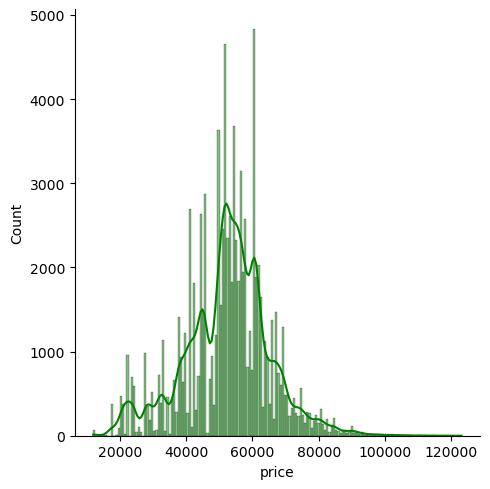

In [54]:
sns.displot(df1['price'],color='green',kde=True)

In [59]:
# INCLUIR TITULO NO GRAFICO

> As the dataset has a wide number of rows with information for the same days, to perform Time Series models we have to resample the data. So, we will use the code groupby (below), to aggregate all rows which have the same day's data and use the mean value of them to create a single row for each day in the dataset. This process is called downsampling.
>
> "Downsampling is to resample a time-series dataset to a wider time frame. For example, from minutes to hours, from days to years. The result will have a reduced number of rows and values can be aggregated with mean(), min(), max(), sum() etc." (Chen, 2020).
>
>The new dataset is called df1_daily_mean.

In [55]:
df1['date'] = pd.to_datetime(df1['date'])

df1_daily_mean = df1.groupby(df1['date'].dt.date)['price'].mean()

df1_daily_mean

C:\Users\barba\AppData\Local\Temp\ipykernel_13980\1976572297.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['date'] = pd.to_datetime(df1['date'])


date
2022-01-03    52113.802120
2022-02-03    52384.847236
2022-02-13    60313.822331
2022-02-14    56120.287087
2022-02-15    56149.915397
2022-02-16    53643.310488
2022-02-17    54501.171604
2022-02-18    53224.650386
2022-02-19    52981.195297
2022-02-20    54247.303856
2022-02-21    51845.794695
2022-02-22    51991.619675
2022-02-23    52172.086514
2022-02-24    52441.797235
2022-02-25    52374.451431
2022-02-26    52063.309830
2022-02-27    52824.242843
2022-02-28    52334.639336
2022-03-03    51919.704211
2022-03-13    52360.828629
2022-03-14    51264.440488
2022-03-15    51810.985112
2022-03-16    51869.054609
2022-03-17    51475.459162
2022-03-18    51924.139056
2022-03-19    51808.754280
2022-03-20    52150.719697
2022-03-21    51214.290386
2022-03-22    51406.713790
2022-03-23    52153.949178
2022-03-24    51583.182456
2022-03-25    52092.968703
2022-03-26    51383.279592
2022-03-27    51160.208098
2022-03-28    51209.790072
2022-03-29    51742.102235
2022-03-30    51558.758

In [56]:
df1_daily_mean = df1_daily_mean.reset_index()

In [60]:
df1_daily_mean['date'] = pd.to_datetime(df1_daily_mean['date'])

> Once we have the dataset with the mean price for the days, we have to merge it with the previous dataset. Now we have: price_x (original) and price_y (mean for each day). The name of the dataset has changed for merged_df.

In [61]:
merged_df = pd.merge(df1, df1_daily_mean, on='date', how='left')

merged_df.head()

,date,airline,from,time_taken,to,price_x,price_y
0,2022-11-02,Air India,Delhi,02h 00m,Mumbai,25612.0,65169.31203
1,2022-11-02,Air India,Delhi,02h 15m,Mumbai,25612.0,65169.31203
2,2022-11-02,Air India,Delhi,24h 45m,Mumbai,42220.0,65169.31203
3,2022-11-02,Air India,Delhi,26h 30m,Mumbai,44450.0,65169.31203
4,2022-11-02,Air India,Delhi,06h 40m,Mumbai,46690.0,65169.31203


> As it has been merged already we only need one row for day in the dataset. So, the code below is to get that.

In [62]:
grouped_df = merged_df.groupby('date').agg({'airline': 'first', 'from': 'first', 'time_taken': 'first', 'to': 'first', 'price_x': 'mean', 'price_y': 'mean'})
grouped_df = grouped_df.reset_index()
grouped_df.head()

,date,airline,from,time_taken,to,price_x,price_y
0,2022-01-03,Vistara,Delhi,02h 10m,Mumbai,52113.802120,52113.802120
1,2022-02-03,Vistara,Delhi,02h 10m,Mumbai,52384.847236,52384.847236
2,2022-02-13,Vistara,Delhi,02h 10m,Mumbai,60313.822331,60313.822331
3,2022-02-14,Air India,Delhi,02h 00m,Mumbai,56120.287087,56120.287087
4,2022-02-15,Vistara,Delhi,02h 10m,Mumbai,56149.915397,56149.915397


> We do not need two columns with the same information (price_y and price_x). So we are dropping price_y and only keeping price_x.

In [63]:
grouped_df.drop('price_y', axis=1, inplace=True)
grouped_df.head(50)

,date,airline,from,time_taken,to,price_x
0,2022-01-03,Vistara,Delhi,02h 10m,Mumbai,52113.802120
1,2022-02-03,Vistara,Delhi,02h 10m,Mumbai,52384.847236
2,2022-02-13,Vistara,Delhi,02h 10m,Mumbai,60313.822331
3,2022-02-14,Air India,Delhi,02h 00m,Mumbai,56120.287087
4,2022-02-15,Vistara,Delhi,02h 10m,Mumbai,56149.915397
5,2022-02-16,Vistara,Delhi,02h 10m,Mumbai,53643.310488
6,2022-02-17,Air India,Delhi,02h 00m,Mumbai,54501.171604
7,2022-02-18,Vistara,Delhi,02h 10m,Mumbai,53224.650386
8,2022-02-19,Vistara,Delhi,02h 10m,Mumbai,52981.195297
9,2022-02-20,Vistara,Delhi,02h 10m,Mumbai,54247.303856


> This dataset, after prepared for Time Series, has only one row of data in the months: January, April, May, June, July, August, September and October. And two rows of data in November and December of 2022.
> 
> So, we are going to drop those rows and only work with the months February and March.
> 
> The dataset now, is called df_timeseries.

In [64]:
grouped_df['date'] = pd.to_datetime(grouped_df['date'])

grouped_df = grouped_df[(grouped_df['date'].dt.month == 2) | (grouped_df['date'].dt.month == 3)]

df_timeseries = grouped_df.reset_index(drop=True)

df_timeseries.head()

,date,airline,from,time_taken,to,price_x
0,2022-02-03,Vistara,Delhi,02h 10m,Mumbai,52384.847236
1,2022-02-13,Vistara,Delhi,02h 10m,Mumbai,60313.822331
2,2022-02-14,Air India,Delhi,02h 00m,Mumbai,56120.287087
3,2022-02-15,Vistara,Delhi,02h 10m,Mumbai,56149.915397
4,2022-02-16,Vistara,Delhi,02h 10m,Mumbai,53643.310488


> In order to apply Time Series is necessary to change the index of the dataset, and replace it with the date. We are using the code set_index to do that.
> 
> "A time series is a series of data points indexed in time order. If you index the dataset by date, you can easily carry out a time series analysis." (AI, 2022).

                                                               338 words

In [65]:
df_timeseries['date'] = pd.to_datetime(df_timeseries['date'])

df_timeseries.set_index('date', inplace=True)

df_timeseries.head(50)

,airline,from,time_taken,to,price_x
date,,,,,
2022-02-03,Vistara,Delhi,02h 10m,Mumbai,52384.847236
2022-02-13,Vistara,Delhi,02h 10m,Mumbai,60313.822331
2022-02-14,Air India,Delhi,02h 00m,Mumbai,56120.287087
2022-02-15,Vistara,Delhi,02h 10m,Mumbai,56149.915397
2022-02-16,Vistara,Delhi,02h 10m,Mumbai,53643.310488
2022-02-17,Air India,Delhi,02h 00m,Mumbai,54501.171604
2022-02-18,Vistara,Delhi,02h 10m,Mumbai,53224.650386
2022-02-19,Vistara,Delhi,02h 10m,Mumbai,52981.195297
2022-02-20,Vistara,Delhi,02h 10m,Mumbai,54247.303856


> Ploting the data, to see how it looks like

<AxesSubplot:xlabel='date'>

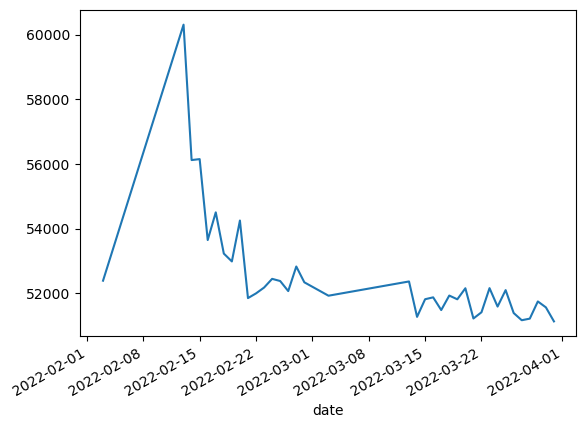

In [66]:
df_timeseries['price_x'].plot()

<Figure size 1400x800 with 0 Axes>

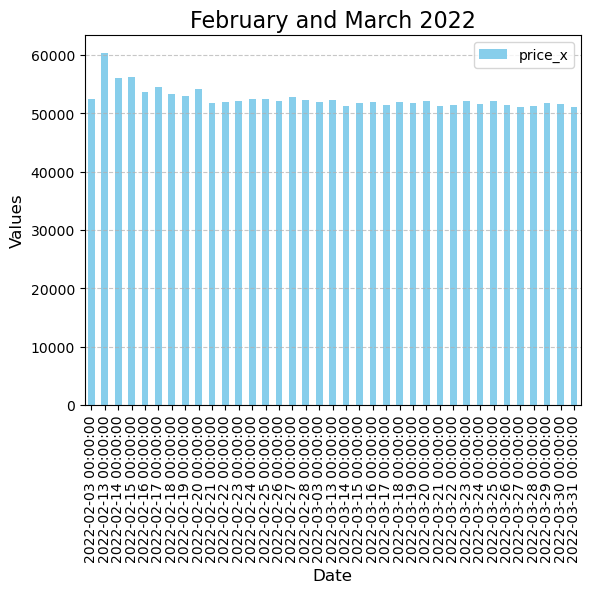

In [67]:
# Filter the data for the months of February and March in the year 2022
df_feb_mar_2022 = df_timeseries['2022-02':'2022-03']

# Plotting a bar chart for February and March
plt.figure(figsize=(14, 8))  # Adjusting the figure size
df_feb_mar_2022.plot(kind='bar', color='skyblue')  # Setting the color of the bars

plt.title('February and March 2022', fontsize=16)  # Setting the title and its font size
plt.xlabel('Date', fontsize=12)  # Setting the x-axis label and its font size
plt.ylabel('Values', fontsize=12)  # Setting the y-axis label and its font size
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding a grid for better visualization

plt.show()

<a id="1"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:black;font-family:arial;font-size:100%;text-align:center;border-radius: 5px;overflow:hidden;font-weight:500">TIME SERIES MODELS</p>

<a id="1"></a>
### <p style="padding:10px;background-color:lightblue;margin:0;color:black;font-family:arial;font-size:100%;text-align:LEFT;border-radius: 5px;overflow:hidden;font-weight:500">1. DICKY FULLER TEST</p>

> To make predictions using Time Series models is necessary checking if the data is stationary or not. In order to do that we can apply the Augmented Dicky Fuller Test.
> 
> "When we make a model for forecasting purposes in time series analysis, we require a stationary time series for better prediction. ADF (Augmented Dickey-Fuller) test is a statistical significance test which means the test will give results in hypothesis tests with null and alternative hypotheses. As a result, we will have a p-value from which we will need to make inferences about the time series, whether it is stationary or not."(Verma, 2021).
> 
> The codes below is to import the Dicky Fuller test in the adfuller library and to apply the test itself. If the p_value is lower then 0.05 the data is stationary, if the p_value is greater then 0.05 the data is non stationary.
> 
> In this case, we have a stationary data.

In [68]:
from  statsmodels.tsa.stattools import adfuller

In [69]:
ADF_result = adfuller(df_timeseries['price_x'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -2.9105431048534594
p-value: 0.04413564275944202


<a id="1"></a>
### <p style="padding:10px;background-color:lightblue;margin:0;color:black;font-family:arial;font-size:100%;text-align:LEFT;border-radius: 5px;overflow:hidden;font-weight:500">2. BASELINE MODEL - ARITHMETIC MEAN</p>

> Applying some Time Series models and checking their forecastings in our project is our main goal. So, we are going to start with very simple models called baseline models.
> 
> "A baseline is a method that uses heuristics, simple summary statistics, randomness, or machine learning to create predictions for a dataset". (Sennikova, 2020).
> 
> Arithmetic mean is a model that applys the mean value of the data test to make predictions.
> 
> The next code is to split the data between train and test, apply this model in order to make predictions for two weeks, evaluate it and plot the results.

Mean Squared Error (MSE) for Arithmetic Mean Forecast: 2489954.6100041973


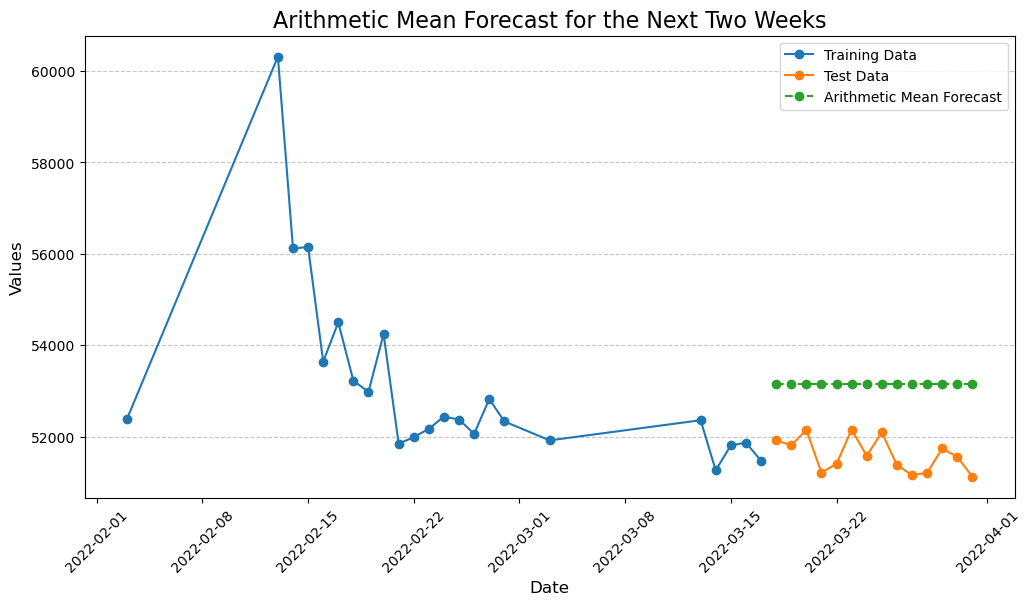

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming df_timeseries is your DataFrame

# Split the data into training and test sets
train = df_timeseries.iloc[:-14]  # Use all data except the last 2 weeks for training
test = df_timeseries.iloc[-14:]  # Last 2 weeks data for testing

# Calculate the mean of the training data
arithmetic_mean = train['price_x'].mean()

# Create a list of the mean values for the length of the test set
arithmetic_mean_forecast = [arithmetic_mean] * len(test)

# Calculate the mean squared error (MSE) for the arithmetic mean forecast
mse_arithmetic_mean = mean_squared_error(test['price_x'], arithmetic_mean_forecast)

# Print the MSE for the arithmetic mean forecast
print(f"Mean Squared Error (MSE) for Arithmetic Mean Forecast: {mse_arithmetic_mean}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['price_x'], label='Training Data', marker='o')
plt.plot(test.index, test['price_x'], label='Test Data', marker='o')
plt.plot(test.index, arithmetic_mean_forecast, label='Arithmetic Mean Forecast', linestyle='--', marker='o')

# Plot settings
plt.title('Arithmetic Mean Forecast for the Next Two Weeks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [71]:
print("Arithmetic Mean Forecasted Values:")
print(arithmetic_mean_forecast)

Arithmetic Mean Forecasted Values:
[53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662, 53144.12684577662]


<a id="1"></a>
### <p style="padding:10px;background-color:lightblue;margin:0;color:black;font-family:arial;font-size:100%;text-align:LEFT;border-radius: 5px;overflow:hidden;font-weight:500">3. BASELINE MODEL - NAIVE FORECAST</p>

> Baseline model - Naive Forecast
Naive is, also, a baseline model that makes predictions based in values it got in the previous period.
> 
> " A naive forecast is one in which the forecast for a given period is simply equal to the value observed in the previous period." (Zach, 2020).
> 
> The code below is to split the data into train and test, make the forecast for the next 14 days, evaluate the model with Mean Squared Error and plot the results.

The Mean Squared Error (MSE) for the Seasonal Naive Forecast is: 0.0


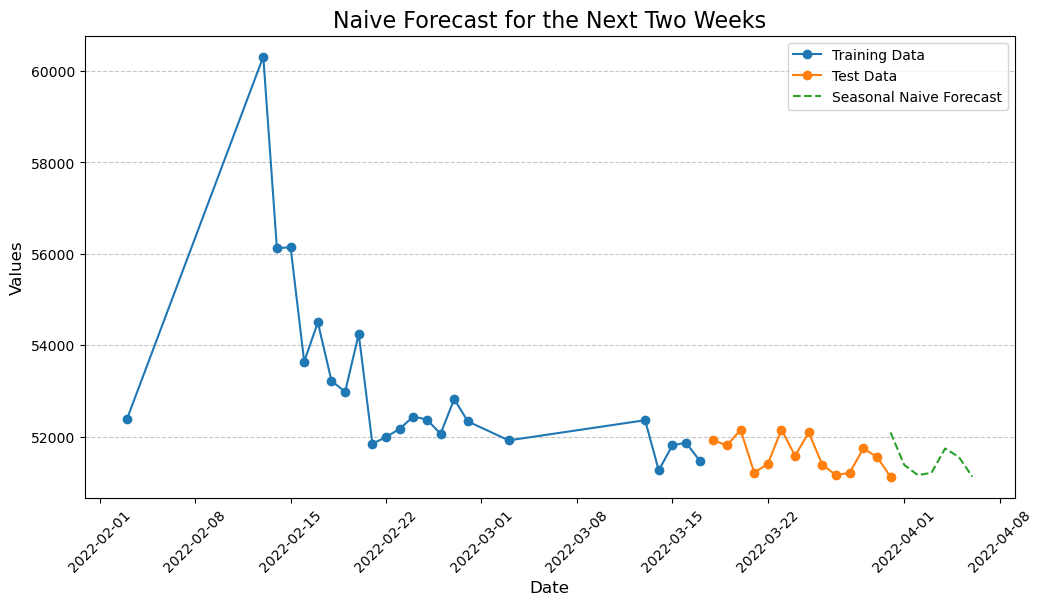

In [72]:
train = df_timeseries.iloc[:-14]  
test = df_timeseries.iloc[-14:]  

season_length = 14
forecast = df_timeseries['price_x'].iloc[-season_length:]

forecast_index = pd.date_range(start=df_timeseries.index[-1], periods=7, freq='D')

mse_seasonal_naive = mean_squared_error(test['price_x'], forecast)
print(f"The Mean Squared Error (MSE) for the Seasonal Naive Forecast is: {mse_seasonal_naive}")

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['price_x'], label='Training Data', marker='o')
plt.plot(test.index, test['price_x'], label='Test Data', marker='o')
plt.plot(forecast_index, forecast.values[-7:], label='Seasonal Naive Forecast', linestyle='--')  

plt.title('Naive Forecast for the Next Two Weeks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<a id="1"></a>
### <p style="padding:10px;background-color:lightblue;margin:0;color:black;font-family:arial;font-size:100%;text-align:LEFT;border-radius: 5px;overflow:hidden;font-weight:500">4. ARIMA</p>

> "ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values." (Prabhakaran, 2021).
> 
> As our data is already stationary, we can apply this model straight away. The code below is to import the ARIMA in the library, choose the forecast period (two weeks in this case), apply the model, evaluate the model using Mean Squared Error and plot the results.

C:\Users\barba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\barba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\barba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\barba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Mean Squared Error (MSE): 138067.34716322186


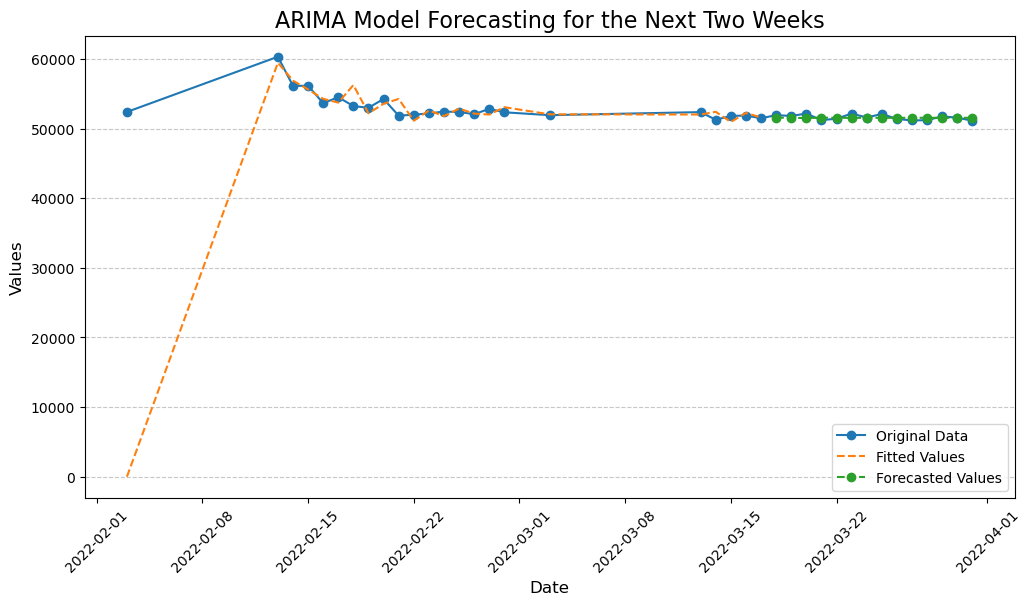

In [73]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd

# Define the forecast period
forecast_period = 14  # Adjust the forecast period according to your requirement

# Split the data into training and test sets
train, test = train_test_split(df_timeseries, test_size=forecast_period, shuffle=False)

# Fit the ARIMA model
model = ARIMA(train['price_x'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next two weeks
forecast_values = model_fit.forecast(forecast_period)

# Evaluate the model
mse = mean_squared_error(test['price_x'], forecast_values)
print(f"Mean Squared Error (MSE): {mse}")

# Create the forecast index
forecast_index = pd.date_range(start=test.index[0], periods=forecast_period, freq='D')

# Plot the original data, the fitted values, and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df_timeseries.index, df_timeseries['price_x'], label='Original Data', marker='o')
plt.plot(model_fit.fittedvalues, label='Fitted Values', linestyle='--')
plt.plot(forecast_index, forecast_values, label='Forecasted Values', linestyle='--', marker='o')

# Plot settings
plt.title('ARIMA Model Forecasting for the Next Two Weeks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()

> Here we have the forecasted values for two weeks, using ARIMA model.

In [74]:
p = 2  
d = 1  
q = 1 

order = (p, d, q)

model = ARIMA(df_timeseries['price_x'], order=order)
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=14)

print(forecast.predicted_mean)

37    51927.350165
38    51519.459646
39    51736.349364
40    51621.336830
41    51682.335650
42    51649.984214
43    51667.142185
44    51658.042250
45    51662.868509
46    51660.308845
47    51661.666394
48    51660.946402
49    51661.328258
50    51661.125736
Name: predicted_mean, dtype: float64


C:\Users\barba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\barba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\barba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\barba\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

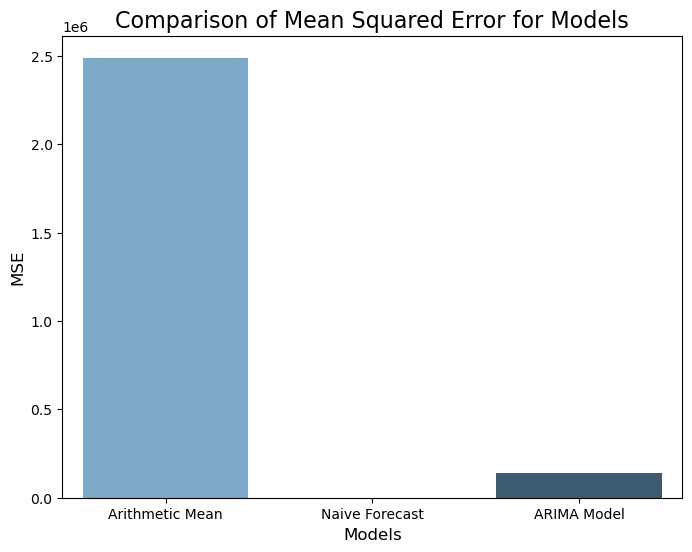

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ["Arithmetic Mean", "Naive Forecast", "ARIMA Model"]

mse_values = [2489954.6100041973, 0.00, 138067.34618518097]  

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=mse_values, palette="Blues_d")
plt.title('Comparison of Mean Squared Error for Models', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.show()

> Now I am dropping two rows in the dataset.

In [76]:
df_timeseries.head(50)

,airline,from,time_taken,to,price_x
date,,,,,
2022-02-03,Vistara,Delhi,02h 10m,Mumbai,52384.847236
2022-02-13,Vistara,Delhi,02h 10m,Mumbai,60313.822331
2022-02-14,Air India,Delhi,02h 00m,Mumbai,56120.287087
2022-02-15,Vistara,Delhi,02h 10m,Mumbai,56149.915397
2022-02-16,Vistara,Delhi,02h 10m,Mumbai,53643.310488
2022-02-17,Air India,Delhi,02h 00m,Mumbai,54501.171604
2022-02-18,Vistara,Delhi,02h 10m,Mumbai,53224.650386
2022-02-19,Vistara,Delhi,02h 10m,Mumbai,52981.195297
2022-02-20,Vistara,Delhi,02h 10m,Mumbai,54247.303856


In [77]:
df_timeseries.drop(pd.to_datetime(['2022-02-03', '2022-03-03']), inplace=True)

In [78]:
df_timeseries.head(40)

,airline,from,time_taken,to,price_x
date,,,,,
2022-02-13,Vistara,Delhi,02h 10m,Mumbai,60313.822331
2022-02-14,Air India,Delhi,02h 00m,Mumbai,56120.287087
2022-02-15,Vistara,Delhi,02h 10m,Mumbai,56149.915397
2022-02-16,Vistara,Delhi,02h 10m,Mumbai,53643.310488
2022-02-17,Air India,Delhi,02h 00m,Mumbai,54501.171604
2022-02-18,Vistara,Delhi,02h 10m,Mumbai,53224.650386
2022-02-19,Vistara,Delhi,02h 10m,Mumbai,52981.195297
2022-02-20,Vistara,Delhi,02h 10m,Mumbai,54247.303856
2022-02-21,Vistara,Delhi,02h 10m,Mumbai,51845.794695


<AxesSubplot:xlabel='date'>

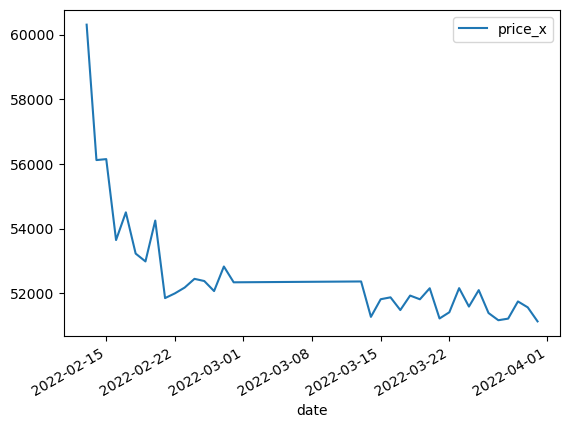

In [79]:
df_timeseries.plot()

<Figure size 1400x800 with 0 Axes>

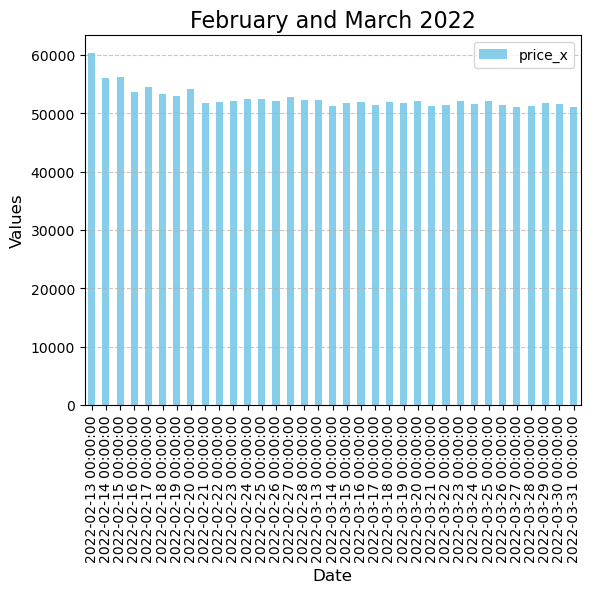

In [80]:
# Filter the data for the months of February and March in the year 2022
df_feb_mar_2022 = df_timeseries['2022-02':'2022-03']

# Plotting a bar chart for February and March
plt.figure(figsize=(14, 8))  # Adjusting the figure size
df_feb_mar_2022.plot(kind='bar', color='skyblue')  # Setting the color of the bars

plt.title('February and March 2022', fontsize=16)  # Setting the title and its font size
plt.xlabel('Date', fontsize=12)  # Setting the x-axis label and its font size
plt.ylabel('Values', fontsize=12)  # Setting the y-axis label and its font size
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding a grid for better visualization

plt.show()

<AxesSubplot:xlabel='date'>

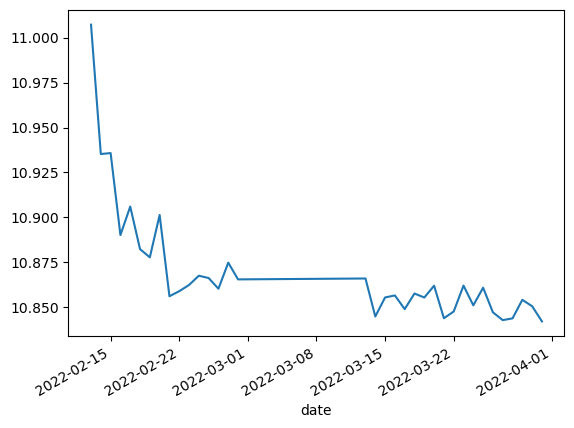

In [81]:
log_price = df_timeseries.price_x.apply(lambda x: np.log(x))
log_price.plot()

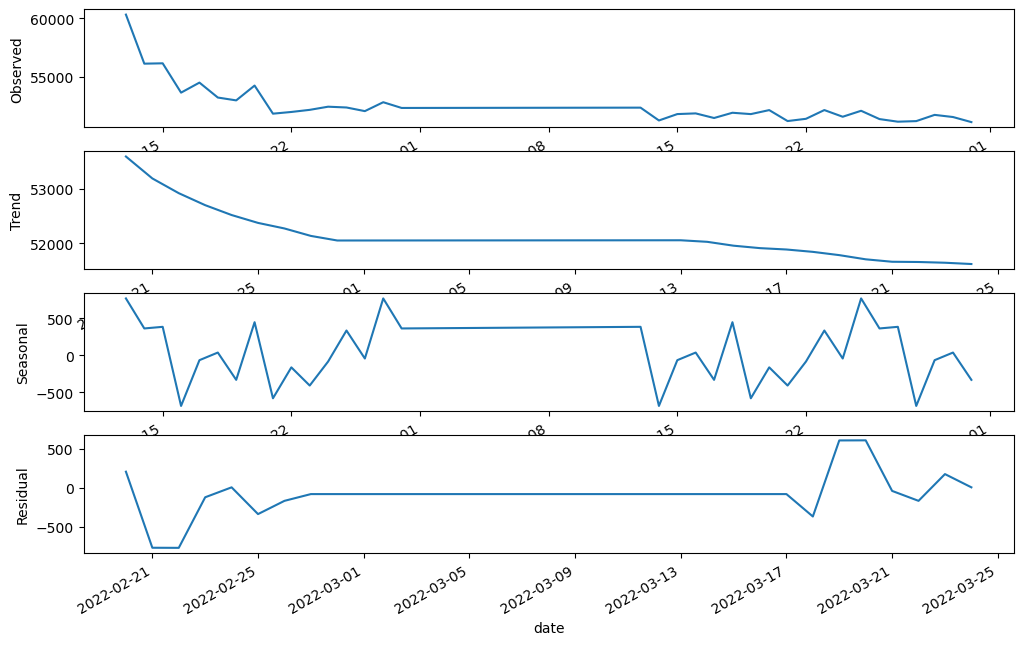

In [82]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


# Ensure that the data is sorted by date
df_timeseries.sort_index(inplace=True)

# Interpolate missing values if necessary
df_timeseries['price_x'].interpolate(inplace=True)

# Decompose the data using the seasonal_decompose() function
decomposition = seasonal_decompose(df_timeseries['price_x'], model='additive', period=14)

# Plot the components of the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.show()

> Checking the frequency of my dataset.

In [83]:
print(df_timeseries.index.inferred_freq)

None


In [84]:
df_timeseries.head(50)

,airline,from,time_taken,to,price_x
date,,,,,
2022-02-13,Vistara,Delhi,02h 10m,Mumbai,60313.822331
2022-02-14,Air India,Delhi,02h 00m,Mumbai,56120.287087
2022-02-15,Vistara,Delhi,02h 10m,Mumbai,56149.915397
2022-02-16,Vistara,Delhi,02h 10m,Mumbai,53643.310488
2022-02-17,Air India,Delhi,02h 00m,Mumbai,54501.171604
2022-02-18,Vistara,Delhi,02h 10m,Mumbai,53224.650386
2022-02-19,Vistara,Delhi,02h 10m,Mumbai,52981.195297
2022-02-20,Vistara,Delhi,02h 10m,Mumbai,54247.303856
2022-02-21,Vistara,Delhi,02h 10m,Mumbai,51845.794695


C:\Users\barba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\barba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\barba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\barba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

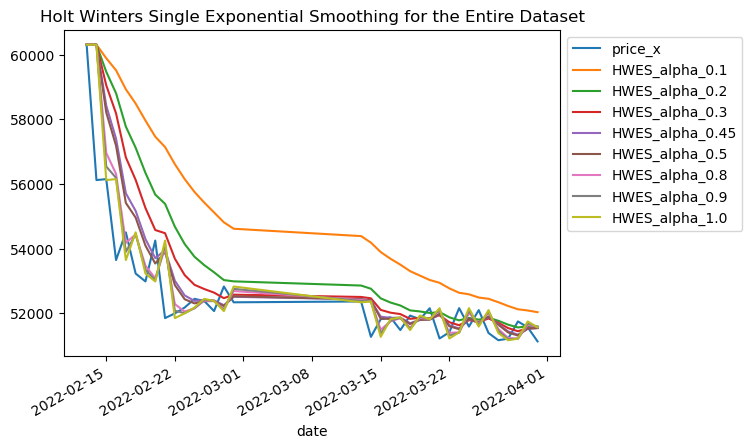

In [85]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Experiment with different values of alpha
alphas = [0.1, 0.2, 0.3, 0.45, 0.5, 0.8, 0.9, 1.0]  # Example alpha values to try

for alpha in alphas:
    df_timeseries[f'HWES_alpha_{alpha}'] = SimpleExpSmoothing(df_timeseries['price_x']).fit(
                                        smoothing_level=alpha, optimized=False, use_brute=True).fittedvalues

# Plot the original and smoothed values for different alpha values
df_timeseries[['price_x'] + [f'HWES_alpha_{alpha}' for alpha in alphas]].plot(title='Holt Winters Single Exponential Smoothing for the Entire Dataset')

# Display the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

The best alpha value for Simple Exponential Smoothing is: 0.8


C:\Users\barba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\barba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\barba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\barba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

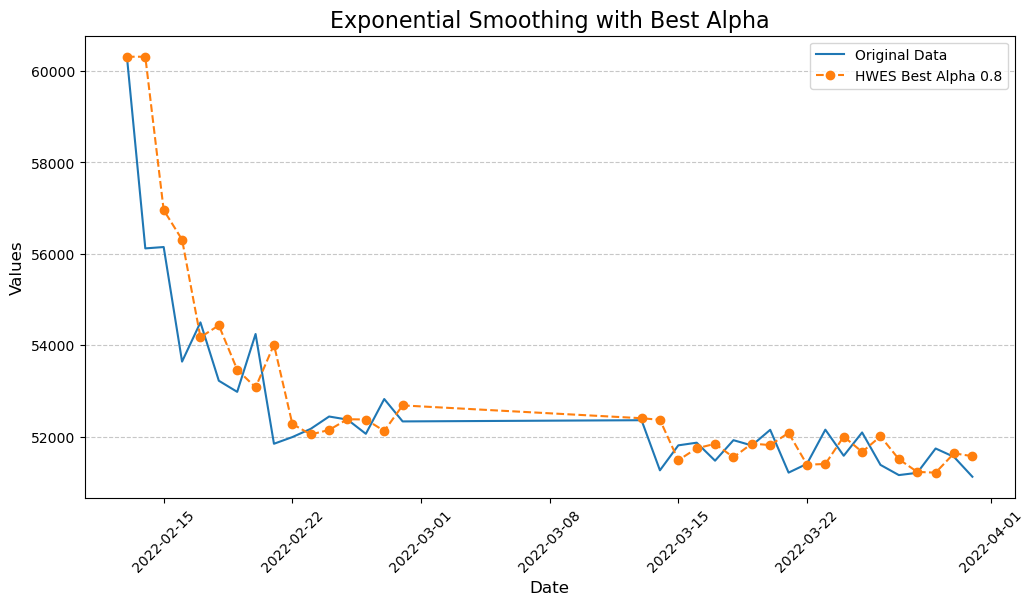

In [86]:
from sklearn.metrics import mean_squared_error

# Initialize variables
best_alpha = None
min_mse = float('inf')

# Find the best alpha value
for alpha in alphas:
    df_timeseries[f'HWES_alpha_{alpha}'] = SimpleExpSmoothing(df_timeseries['price_x']).fit(
        smoothing_level=alpha, optimized=False, use_brute=True).fittedvalues
    mse = mean_squared_error(df_timeseries['price_x'], df_timeseries[f'HWES_alpha_{alpha}'])
    if mse < min_mse:
        min_mse = mse
        best_alpha = alpha

# Print the best alpha value
print(f"The best alpha value for Simple Exponential Smoothing is: {best_alpha}")

# Plot the original and smoothed values for the best alpha value
plt.figure(figsize=(12, 6))
plt.plot(df_timeseries.index, df_timeseries['price_x'], label='Original Data')
plt.plot(df_timeseries.index, df_timeseries[f'HWES_alpha_{best_alpha}'], label=f'HWES Best Alpha {best_alpha}', linestyle='--', marker='o')

# Plot settings
plt.title('Exponential Smoothing with Best Alpha', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<a id="1"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:BLACK;font-family:arial;font-size:100%;text-align:center;border-radius:5px;overflow:hidden;font-weight:500">BARBARA'S APPROCHE</p>

> To make sure I don't get any previous changes from the first approche I will reading our dataset again to start a different cleaning metod.  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('business.csv')

In [3]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...,23:55,Mumbai,"46,690"


In [4]:
df.shape

(93487, 11)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

> (!) Describe about shape, duplicates and missing values

<a id="1"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;border-radius:5px;color:BLACk;font-family:arial;font-size:100%;text-align:center;overflow:hidden;font-weight:500">EDA + VISUALISATION</p>

> (!) Here I'm thinking to include some insigths as correlation heatmap to explain why I decided to drop/keep columns
>
> (!) Specialy correlation between number of stops for a flight and the flight ticket price

<a id="1"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;border-radius:5px;color:BLACk;font-family:arial;font-size:100%;text-align:center;overflow:hidden;font-weight:500">CLEANING</p>

In [7]:
df2 = df.drop(['ch_code', 'num_code', 'dep_time', 'arr_time'], axis=1)

> In my point of view them 'stop' column have a higher weigh in our analisys, that implies in a considerable correlation beteween number of stops and price. For that reason I decided keep that colomun and impute numerical values so we can use in our analyse

In [8]:
value_counts = df2['airline'].value_counts()
print(value_counts)

Vistara      60589
Air India    32898
Name: airline, dtype: int64


In [9]:
value_counts = df2['from'].value_counts()
print(value_counts)

Mumbai       19858
Delhi        18316
Bangalore    16441
Kolkata      13473
Hyderabad    12870
Chennai      12529
Name: from, dtype: int64


In [10]:
value_counts = df2['stop'].value_counts()
print(value_counts)

1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t                   81489
non-stop                                                                          8102
2+-stop                                                                           1083
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\r\n\t\t\t\t\t\t\t\t\t\t\t\t              810
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\r\n\t\t\t\t\t\t\t\t\t\t\t\t              776
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\r\n\t\t\t\t\t\t\t\t\t\t\t\t              257
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\r\n\t\t\t\t\t\t\t\t\t\t\t\t            242
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\r\n\t\t\t\t\t\t\t\t\t\t\t\t              152
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\r\n\t\t\t\t\t\t\t\t\t\t\t\t               93
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\r\n\t\t\t\t\t\t\t\t\t\t\t\t               86
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\r\n\t\t\t\t\t\t\t\t\t\t\t\t       75
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyder

In [11]:
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("non-stop","0", regex=True)
df2["stop"]=df2["stop"].replace("2+-stop","2", regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\r\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\r\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\r\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True) 
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)            
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Kolkata\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)           
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)               
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)           
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAU\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)                
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAY\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)               
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)              
df2["stop"]=df2["stop"].replace("1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia HYD\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)               

In [12]:
df2

,date,airline,from,time_taken,stop,to,price
0,11-02-2022,Air India,Delhi,02h 00m,0,Mumbai,"25,612"
1,11-02-2022,Air India,Delhi,02h 15m,0,Mumbai,"25,612"
2,11-02-2022,Air India,Delhi,24h 45m,1,Mumbai,"42,220"
3,11-02-2022,Air India,Delhi,26h 30m,1,Mumbai,"44,450"
4,11-02-2022,Air India,Delhi,06h 40m,1,Mumbai,"46,690"
...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,Chennai,10h 05m,1,Hyderabad,"69,265"
93483,31-03-2022,Vistara,Chennai,10h 25m,1,Hyderabad,"77,105"
93484,31-03-2022,Vistara,Chennai,13h 50m,1,Hyderabad,"79,099"
93485,31-03-2022,Vistara,Chennai,10h 00m,1,Hyderabad,"81,585"


> Convert remaining "categorical" values to "numerical" values

In [13]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [14]:
df2["airline"] = lab_enc.fit_transform(df2["airline"])
df2["from"] = lab_enc.fit_transform(df2["from"])
df2["to"] = lab_enc.fit_transform(df2["to"])
df2["date"] = lab_enc.fit_transform(df2["date"])

In [15]:
df2

,date,airline,from,time_taken,stop,to,price
0,10,0,2,02h 00m,0,5,"25,612"
1,10,0,2,02h 15m,0,5,"25,612"
2,10,0,2,24h 45m,1,5,"42,220"
3,10,0,2,26h 30m,1,5,"44,450"
4,10,0,2,06h 40m,1,5,"46,690"
...,...,...,...,...,...,...,...
93482,48,1,1,10h 05m,1,3,"69,265"
93483,48,1,1,10h 25m,1,3,"77,105"
93484,48,1,1,13h 50m,1,3,"79,099"
93485,48,1,1,10h 00m,1,3,"81,585"


<a id="1"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;border-radius:5px;color:BLACk;font-family:arial;font-size:100%;text-align:center;overflow:hidden;font-weight:500">SUPERVISED MODELS</p>


> (!) Here I will include an indrotuction of the charpter 

<a id="1"></a>
### <p style="padding:10px;background-color:lightblue;margin:0;border-radius:5px;color:BLACk;font-family:arial;font-size:100%;text-align:left;overflow:hidden;font-weight:500">1. RANDOM FOREST REGRESSOR</p>

>  Random Forest is an ensemble learning method known for its ability to handle complex relationships and capture non-linear patterns in the data. It combines multiple decision trees to reduce overfitting and improve generalization. In this case, it's chosen because of its effectiveness in handling a variety of features and capturing interactions between them.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert date to datetime
df2['date'] = pd.to_datetime(df2['date'])

# Remove commas and convert 'price' column to numeric
df2['price'] = df2['price'].str.replace(',', '').astype(float)

# Encode categorical variables
label_encoder = LabelEncoder()
df2['airline'] = label_encoder.fit_transform(df2['airline'])
df2['from'] = label_encoder.fit_transform(df2['from'])
df2['stop'] = label_encoder.fit_transform(df2['stop'])
df2['to'] = label_encoder.fit_transform(df2['to'])

# Split data into features (X) and target (y)
X = df2[['airline', 'from', 'stop', 'to']]
y = df2['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict prices on the test set
y_pred = model_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2}')


Mean Absolute Error: 5430.145060494133
Mean Squared Error: 61844555.60866476
R-squared: 0.6343014844962763


> The Random Forest Regressor demonstrates a relatively low MAE, indicating that, on average, its predictions are close to the actual prices. Additionally, the R-squared value of 0.6343 suggests that the model captures a substantial portion of the variance in flight prices.

##### MAKE PREDICTION

In [19]:
# Example prediction
rf_data = [[5, 2, 0, 3]]  
predicted_price = model_rf.predict(rf_data)
print(f'Random Forest Regressor Predicted Price: {predicted_price[0]}')

Random Forest Regressor Predicted Price: 24582.110756322512


C:\Users\barba\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


> Where: 
> 
> * 1 represents the airline 
> * 2 represents the departure city.
> * 0 represents the number of stops.
> * 3 represents the destination city.
>
> Assuming it's encoded in the same way as in the training data

<a id="1"></a>
### <p style="padding:10px;background-color:lightblue;margin:0;border-radius:5px;color:BLACk;font-family:arial;font-size:100%;text-align:left;overflow:hidden;font-weight:500">2. SUPPORT VECTOR REGRESSION (SVR)</p>

> SVR is a powerful regression algorithm that can handle both linear and non-linear relationships. It's particularly useful when dealing with high-dimensional data or when there's a need to control the margin of error in predictions. In this case, it's chosen for its flexibility and potential to capture complex relationships in the flight price data.

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Standardize numerical features
scaler = StandardScaler()
df2[['from', 'stop', 'to']] = scaler.fit_transform(df2[['from', 'stop', 'to']])

In [21]:
from sklearn.svm import SVR

# Initialize the SVR model
model_svr = SVR(kernel='rbf')  # You can try different kernels ('linear', 'poly', etc.)

# Train the model
model_svr.fit(X_train, y_train)

SVR()

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict prices on the test set
y_pred_svr = model_svr.predict(X_test)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR Mean Absolute Error: {mae_svr}')
print(f'SVR Mean Squared Error: {mse_svr}')
print(f'SVR R-squared: {r2_svr}')


SVR Mean Absolute Error: 9445.883310776953
SVR Mean Squared Error: 164142816.1510493
SVR R-squared: 0.029392585874943644


> SVR, on the other hand, shows a higher MAE and a significantly lower R-squared value of 0.0294. This suggests that the SVR model may not be the best choice for this specific prediction task

##### MAKE PREDICTION

In [23]:
srv_data = [[5, 2, 0, 3]]
predicted_price_svr = model_svr.predict(srv_data)
print(f'SVR Predicted Price: {predicted_price_svr[0]}')

SVR Predicted Price: 54253.60417270623


C:\Users\barba\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


<a id="1"></a>
### <p style="padding:10px;background-color:lightblue;margin:0;border-radius:5px;color:BLACk;font-family:arial;font-size:100%;text-align:left;overflow:hidden;font-weight:500">3. XGBOOST</p>

> XGBoost is an advanced ensemble learning algorithm known for its efficiency and accuracy. It's particularly effective in handling large datasets and capturing complex patterns. In this case, it's chosen because it's likely to provide accurate predictions for flight prices.

In [24]:
from xgboost import XGBRegressor

# Initialize the XGBoost model
model_xgb = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [25]:
# Predict prices on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost Mean Absolute Error: {mae_xgb}')
print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R-squared: {r2_xgb}')

XGBoost Mean Absolute Error: 5428.739905650838
XGBoost Mean Squared Error: 61824848.74410443
XGBoost R-squared: 0.634418014901322


> XGBoost performs similarly to Random Forest, with a low MAE and a high R-squared value of approximately 0.6344. This underscores the effectiveness of ensemble methods for this task.

<a id="1"></a>
### <p style="padding:10px;background-color:lightblue;margin:0;border-radius:5px;color:BLACk;font-family:arial;font-size:100%;text-align:left;overflow:hidden;font-weight:500">4. K-NEAREST NEIGHBORS REGRESSOR</p>

In [26]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the K-Nearest Neighbors model
model_knn = KNeighborsRegressor(n_neighbors=5) 

# Train the model
model_knn.fit(X_train, y_train)


KNeighborsRegressor()

In [27]:
# Assuming you have already trained the K-Nearest Neighbors Regressor model (model_knn) and have the test set (X_test, y_test)

# Predict prices on the test set
y_pred_knn = model_knn.predict(X_test)

# Evaluate the model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'K-Nearest Neighbors Mean Absolute Error: {mae_knn}')
print(f'K-Nearest Neighbors Mean Squared Error: {mse_knn}')
print(f'K-Nearest Neighbors R-squared: {r2_knn}')

K-Nearest Neighbors Mean Absolute Error: 6346.67248903626
K-Nearest Neighbors Mean Squared Error: 77744342.70520698
K-Nearest Neighbors R-squared: 0.5402830461583331


> The K-Nearest Neighbors model exhibits a reasonable performance with an R-squared value of 0.5403. This suggests that it captures a substantial portion of the underlying patterns in the data.

##### MAKE PREDICTION

In [28]:
knn_data = [[5, 2, 0, 3]]
predicted_price_knn = model_knn.predict(knn_data)
print(f'KNN Predicted Price: {predicted_price_knn[0]}')

KNN Predicted Price: 24504.0


C:\Users\barba\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


<a id="1"></a>
### <p style="padding:10px;background-color:lightblue;margin:0;border-radius:5px; color:BLACH;font-family:arial;font-size:100%;text-align:left;overflow:hidden;font-weight:500">5. LINEAR REGRESSION</p>

In [29]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df2['airline_code'] = label_encoder.fit_transform(df2['airline'])
df2['from_code'] = label_encoder.fit_transform(df2['from'])
df2['to_code'] = label_encoder.fit_transform(df2['to'])

In [30]:
# Define Features (X) and Target (y)
features = ['airline_code', 'from_code', 'to_code', 'stop']
X = df2[features]
y = df2['price']

In [31]:
from sklearn.model_selection import train_test_split

#Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train, y_train)

LinearRegression()

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict prices on the test set
y_pred = model_lr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 9209.6822570692
Mean Squared Error: 147513726.99784905
R-squared: 0.12772352475313298


> Linear Regression shows the highest MAE and relatively low R-squared value of 0.1277. This indicates that while the model provides some predictive power, it may not capture all the complexities in the data.

##### MAKE PREDICTION

In [34]:
data_lr = [[5, 2, 0, 3]]  
predicted_price = model_lr.predict(data_lr)
print(f'Linear Regression Predicted Price: {predicted_price[0]}')

Linear Regression Predicted Price: 95683.57900729802


C:\Users\barba\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<a id="1"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:black;font-family:arial;font-size:100%;text-align:center;border-radius: 5px;overflow:hidden;font-weight:500">COMPARING MODELS</p>

In [35]:
# Import necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Initialize models
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_svr = SVR(kernel='rbf')
model_lr = LinearRegression()
model_xgb = XGBRegressor(n_estimators=100, random_state=42)
model_knn = KNeighborsRegressor(n_neighbors=5)

# List of models for iteration
models = [model_rf,model_svr,model_lr,model_xgb,model_knn]
model_names = ['Random Forest', 'SVR', 'Linear Regression', 'XGBoost', 'KNN']

# Train and evaluate models
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Metrics for {name}:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("-" * 30)


Metrics for Random Forest:
Mean Absolute Error: 5430.145060494133
Mean Squared Error: 61844555.60866476
R-squared: 0.6343014844962763
------------------------------
Metrics for SVR:
Mean Absolute Error: 9440.755365049125
Mean Squared Error: 165081272.04563275
R-squared: 0.023843319263885387
------------------------------
Metrics for Linear Regression:
Mean Absolute Error: 9209.6822570692
Mean Squared Error: 147513726.99784905
R-squared: 0.12772352475313298
------------------------------
Metrics for XGBoost:
Mean Absolute Error: 5428.739905650838
Mean Squared Error: 61824848.74410443
R-squared: 0.634418014901322
------------------------------
Metrics for KNN:
Mean Absolute Error: 6452.183495561023
Mean Squared Error: 78602974.81543054
R-squared: 0.535205792631612
------------------------------


> Based on these results, the Random Forest Regressor and XGBoost Regressor appear to be the most effective models for predicting flight prices in this dataset. They both demonstrate low MAE and high R-squared values, indicating accurate predictions and good capture of underlying patterns. It's important to note that model performance may vary depending on the specific characteristics of the dataset, and further experimentation or tuning may be necessary for optimal results.

<a id="1"></a>
### <p style="padding:10px;background-color:lightblue;margin:0;border-radius:5px; color:BLACH;font-family:arial;font-size:100%;text-align:left;overflow:hidden;font-weight:500">6. CLUSTER</p>

> (!) I'm not much sure about this one, so we can discuss about keep or not

In [36]:
pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [37]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import skfuzzy as fuzz

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [40]:
# Define the number of clusters
n_clusters = 3  

# Apply FCM
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_pca.T, n_clusters, 2, error=0.005, maxiter=1000, init=None
)

In [41]:
# Determine the most likely cluster for each data point
cluster_membership = np.argmax(u, axis=0)


##### VISUALIZING THE CLUSTERS

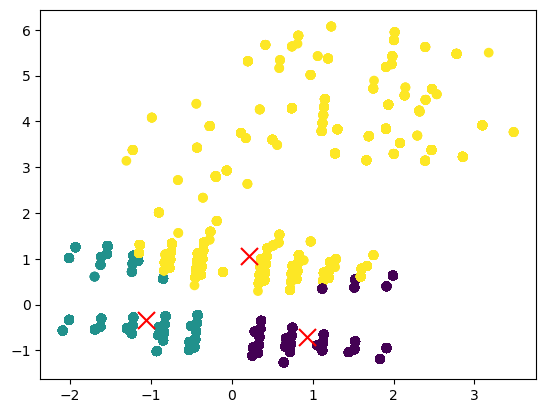

In [42]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_membership, cmap='viridis')
plt.scatter(cntr[:, 0], cntr[:, 1], marker='x', s=150, c='r')
plt.show()


<a id="1"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:black;font-family:arial;font-size:100%;text-align:center;border-radius: 5px;overflow:hidden;font-weight:500">REFERENCES</p>

(TO EDIT LATER)
! add here all the refereces you have used

Dataset: 
https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction